### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 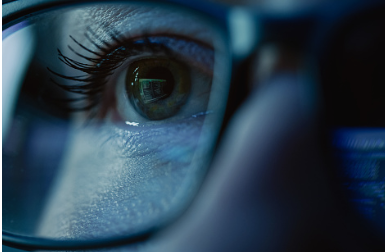 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

import os
import warnings
warnings.filterwarnings("ignore")

##  <mark><span  style= "font-family: Times New Roman">Data loading</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

Let's see how people with glasses look.

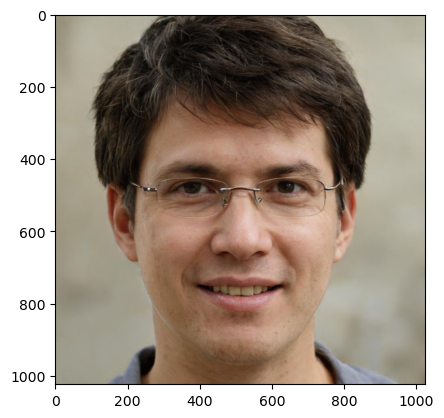

In [2]:
img = mpimg.imread(r"D:\DS&ML\Test\Glasses\glasses\train\glasses\face-175.jpg")
plt.imshow(img)
plt.show()

In [3]:
img.shape

(1024, 1024, 3)

Let's see how people without glasses look.

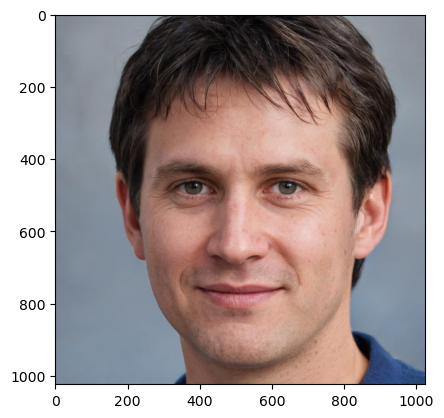

In [4]:
img1 = mpimg.imread(r"D:\DS&ML\Test\Glasses\glasses\train\no_glasses\face-152.jpg")
plt.imshow(img1)
plt.show()

In [5]:
img1.shape

(1024, 1024, 3)

In [6]:
#Rescaling the imgae
#the images are in RGB so we convert them into grayscale
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [17]:
#Loading the data
train_data = train.flow_from_directory(r"D:\DS&ML\Test\Glasses\glasses\train",
                                      target_size=(256,256),
                                      batch_size=3,
                                      class_mode='binary')

validation_data = validation.flow_from_directory(r"D:\DS&ML\Test\Glasses\glasses\validation",
                                      target_size=(256,256),
                                      batch_size=3,
                                      class_mode='binary')

Found 44 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


##  <mark><span  style= "font-family: Times New Roman">Model training and tuning</span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

In [21]:
# models that input or output data sequences are known as sequence models
#Sequential models are widely used in data sequence, ex:converting voice to text, image to array, video recognition
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(256,256,3)))

#Relu stands for Rectified linear activation function.
model.add(Activation('relu'))

#using pooling to reduce the dimension of the image
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2)))

#Relu function will output the input directly if it is positive, otherwise, it will output zero.
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#flattens the multi-dimensional input tensors into a one dimension,
model.add(Flatten())

#A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the model.
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [22]:
#Compile is used for model evaluation process
#Optimization is an important process which optimize the input weights by comparing the prediction and the loss function
#We are using rmsprop optimizer to optimize the learning rate, the best part of using the rmsprop is it splits down the model.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
#Fitting the model
model.fit = model.fit(train_data,
                      steps_per_epoch=5,
                      epochs=14,
                      validation_data=validation_data)

Epoch 1/14
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 727ms/step - accuracy: 0.3694 - loss: 2.2442 - val_accuracy: 0.7692 - val_loss: 0.5573
Epoch 2/14
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 491ms/step - accuracy: 0.8228 - loss: 0.4741 - val_accuracy: 0.6923 - val_loss: 0.6285
Epoch 3/14
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.4926 - loss: 1.1853 - val_accuracy: 0.7692 - val_loss: 0.5524
Epoch 4/14
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7692 - val_loss: 0.5524
Epoch 5/14
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step - accuracy: 0.8815 - loss: 0.4548 - val_accuracy: 0.7692 - val_loss: 0.6579
Epoch 6/14
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step - accuracy: 0.5481 - loss: 0.7420 - val_accuracy: 0.8077 - val_loss: 0.5495
Epoch 7/14
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 0.5898 - loss: 0.6574 - val_accuracy: 0.8462 - val_loss: 0.4819
Epoch 8/14
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.

We got pretty good accuracy of our model. This can also be because we have less data.

In [26]:
validation_data.class_indices

{'glasses': 0, 'no_glasses': 1}

We just checked the indices of each class as it help in predicting the data.

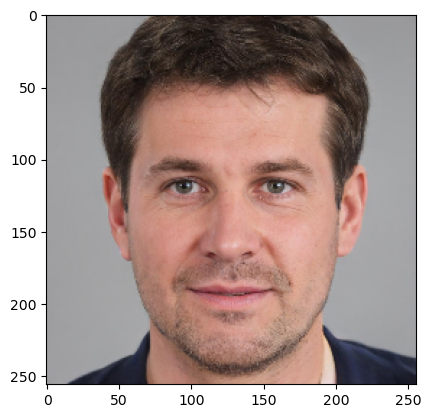

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Person does not have glasses


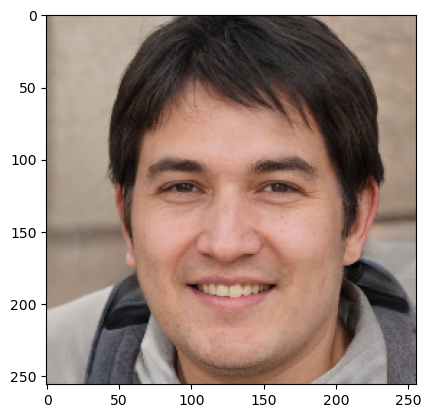

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Person does not have glasses


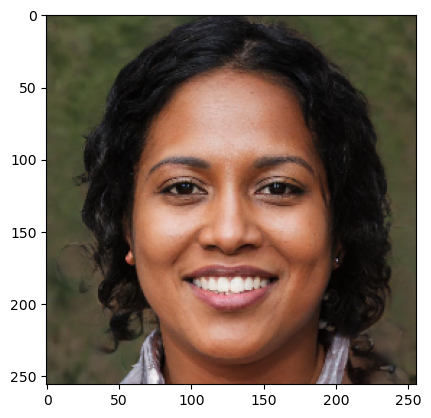

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Person does not have glasses


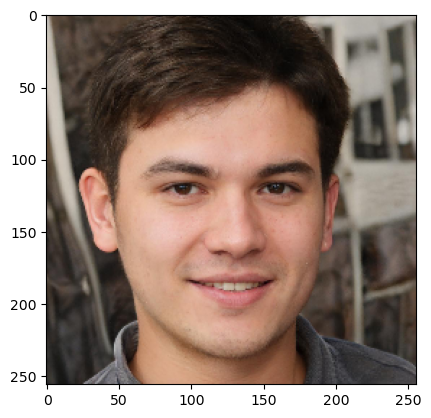

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Person does not have glasses


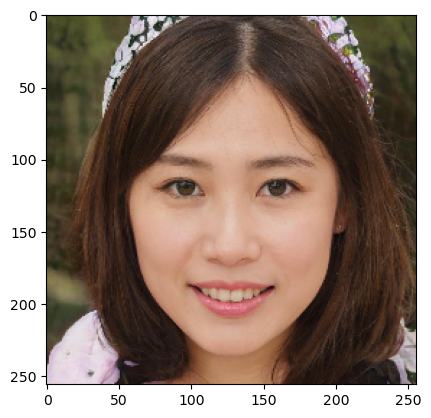

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Person does not have glasses


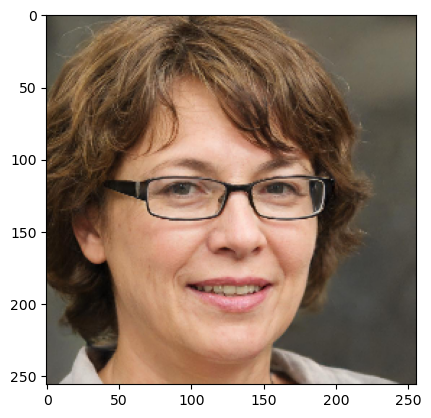

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Person has glasses


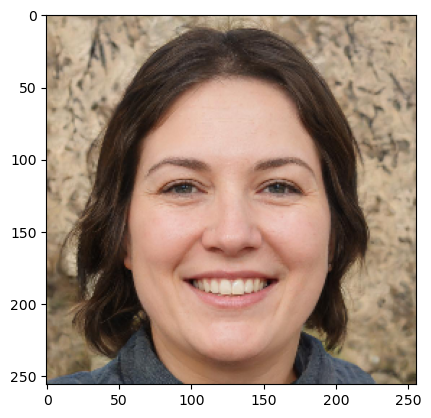

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Person does not have glasses


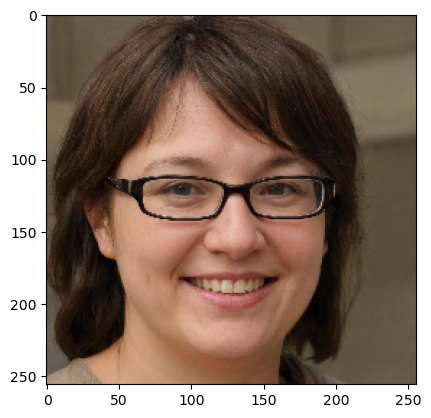

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Person has glasses


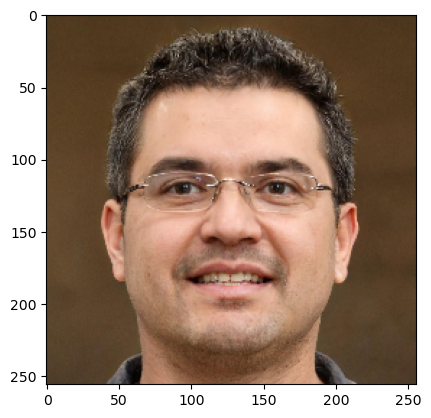

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Person does not have glasses


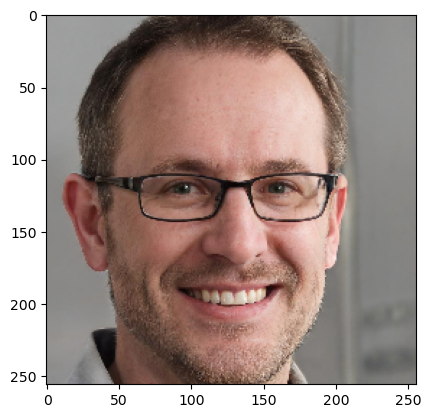

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Person has glasses


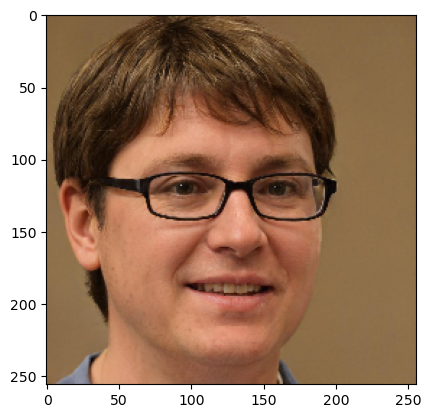

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Person has glasses


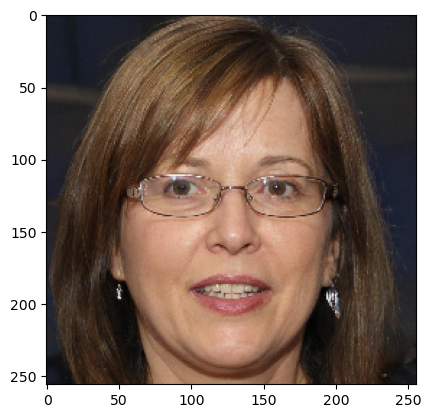

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Person does not have glasses


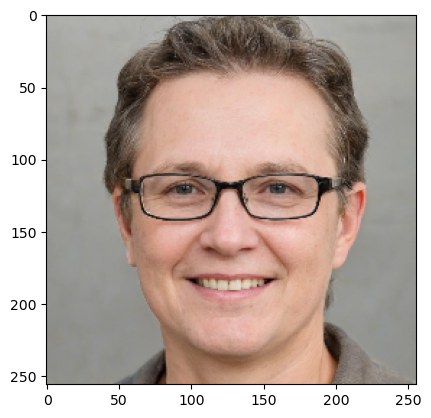

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Person has glasses


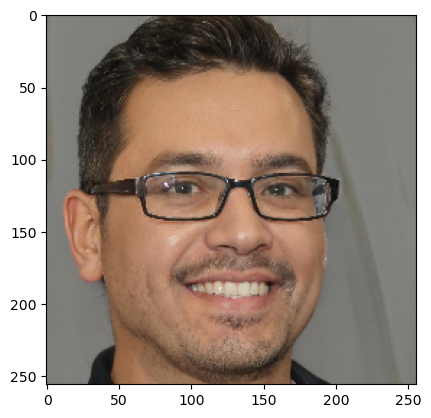

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Person has glasses


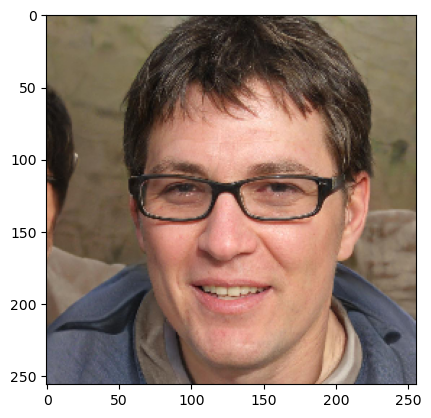

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Person has glasses


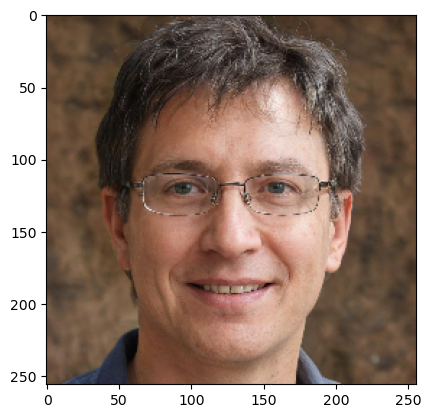

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Person has glasses


In [27]:
#Predicting the images according to the classes
dir_path = r"D:\DS&ML\Test\Glasses\glasses\test"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(256,256))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("Person has glasses")
    else:
        print("Person does not have glasses") 

##  <mark><span  style= "font-family: Times New Roman">Conclusion</span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

- As we can see above the model is able to classify the images, if the person in image has glasses or not.
- Some prediction are not correct but that can happen as the model is not 100% perfect.